In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from importlib import reload

import scipy.stats as stats

import wrangle_zillow as wz

In [2]:
zillow = wz.wrangle_zillow_2()

In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71945 entries, 0 to 77578
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      71945 non-null  int64  
 1   logerror                      71945 non-null  float64
 2   transactiondate               71945 non-null  object 
 3   bathroomcnt                   71945 non-null  float64
 4   bedroomcnt                    71945 non-null  float64
 5   buildingqualitytypeid         44951 non-null  float64
 6   calculatedbathnbr             71841 non-null  float64
 7   calculatedfinishedsquarefeet  71923 non-null  float64
 8   finishedsquarefeet12          71705 non-null  float64
 9   fips                          71945 non-null  float64
 10  fullbathcnt                   71841 non-null  float64
 11  latitude                      71945 non-null  float64
 12  longitude                     71945 non-null  float64
 13  l

In [4]:
zillow['county'] = zillow.fips.replace({6037:'LA', 6059:'Orange', 6111:'Ventura'})
zillow.drop(columns='fips', inplace=True)


In [6]:
train, test, split = wz.split_data(zillow)

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. 

### Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

<AxesSubplot:xlabel='county', ylabel='logerror'>

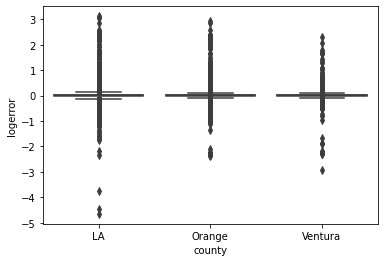

In [7]:
sns.boxplot(data=train, x='county', y='logerror')

In [9]:
la = train[train.county == 'LA'].logerror
orange = train[train.county == 'Orange'].logerror
ventura = train[train.county == 'Ventura'].logerror

In [10]:
stats.kruskal(la, orange, ventura)

KruskalResult(statistic=8.74144065100726, pvalue=0.012642130838150889)

**p < alpha (0.05) so we can say there is a difference in the means of the logerrors of the three different counties.**

### What variables have a strong correlation with ```logerror```?

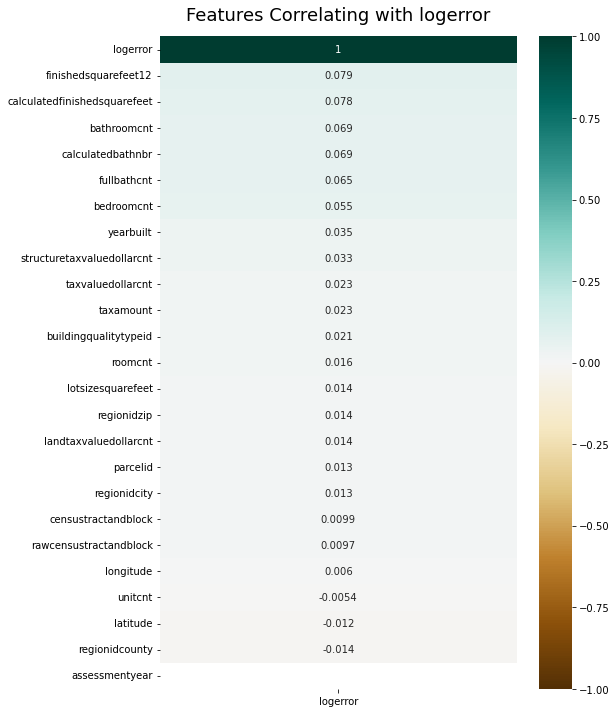

In [13]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['logerror']].sort_values(by='logerror', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with logerror', fontdict={'fontsize':18}, pad=16);